# TSP
Wygeneruj chmurę n losowych punktów w 2D, a następnie zastosuj algorytm symulowa-
nego wyżarzania do przybliżonego rozwiązania problemu komiwojażera dla tych punk-
tów.
a) Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości n oraz 3
różnych układów punktów w 2D (rozkład jednostajny, rozkład normalny z czterema
różnymi grupami parametrów, dziewięć odseparowanych grup punktów).
b) Zbadaj wpływ sposobu generacji sąsiedniego stanu (consecutive swap vs. arbitrary
swap) oraz funkcji zmiany temperatury na zbieżność procesu optymalizacji.
c) Przedstaw wizualizację (saoptimset) działania procedury minimalizującej funkcję
celu.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

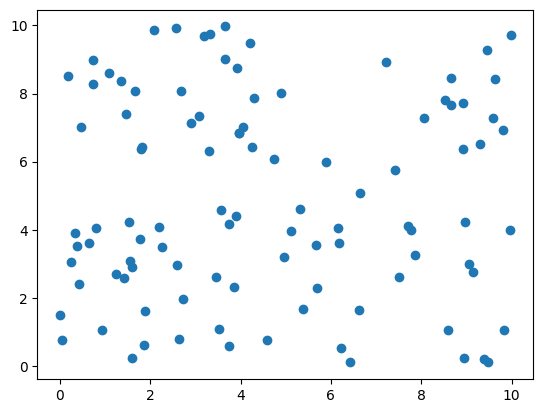

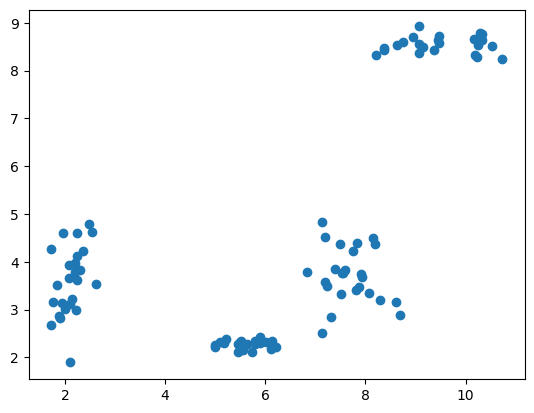

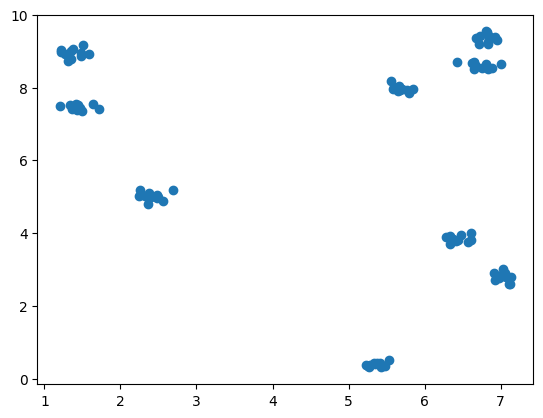

In [29]:
def generate_points(n, distribution='uniform'):
    if distribution == 'uniform':
        return np.random.uniform(0, 10, (n, 2))
    elif distribution == 'normal':
        params = [
            (np.random.uniform(0, 10), np.random.uniform(0, 10), np.random.uniform(0, 1), np.random.uniform(0, 1)),
            (np.random.uniform(0, 10), np.random.uniform(0, 10), np.random.uniform(0, 1), np.random.uniform(0, 1)),
            (np.random.uniform(0, 10), np.random.uniform(0, 10), np.random.uniform(0, 1), np.random.uniform(0, 1)),
            (np.random.uniform(0, 10), np.random.uniform(0, 10), np.random.uniform(0, 1), np.random.uniform(0, 1)),
        ]
        points = []
        for mean_x, mean_y, std_x, std_y in params:
            points.append(np.random.normal([mean_x, mean_y], [std_x, std_y], (n//4, 2)))
        return np.concatenate(points)
    elif distribution == 'groups':
        points = []
        for i in range(9):
            middle = np.random.uniform(0, 10, 2)
            points.append(np.random.normal(middle, 0.1, (n//9, 2)))
        return np.concatenate(points)
        

def draw_points(points, label= None):
    
    plt.scatter(points[:, 0], points[:, 1], label=label)
    plt.show()

draw_points(generate_points(100, 'uniform'), 'uniform')
draw_points(generate_points(100, 'normal'), 'normal')
draw_points(generate_points(100, 'groups'), 'groups')
        

In [33]:
def tsp():
    points = generate_points(100, 'uniform')
    s0 = np.random.permutation(len(points))
    s = s0
    